In [1]:
# imports
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
import random
import numpy as np
import random as rnd
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
import math
from statistics import mode

In [2]:
statements = pd.read_csv('statements.csv')

# removing punctuation
statements['text'] = statements['text'].str.replace(r'[^\w\s]+', '')
#converting everything to lower case
statements['text'] = statements['text'].str.lower()

# remove stop words
stop_words = stopwords.words('english')
statements['text'] = statements['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# split text into words
i = 0
while i in range (len(statements)):
    statements['text'][i] = statements['text'][i].split()
    i +=1
    
# make sub dfs by speaker
obama_df = statements[statements['speaker'] == 'obama']
trump_df = statements[statements['speaker'] == 'trump']
trump_df.reset_index(inplace = True)
    

In [3]:
statements

,id,speaker,text
0,0,obama,"[recession, marvins, competitors, closed, doze..."
1,1,obama,"[rise, fall, journey, one, nation, one, people]"
2,2,obama,"[differences, differences, personal]"
3,3,obama,"[thats, weve, excluded, lobbyists, policymakin..."
4,4,obama,"[recognize, many, still, strong, desire, focus..."
...,...,...,...
995,995,trump,"[would, like, ask, observe, moment, silence, v..."
996,996,trump,"[dont, give, answer, im, going, win, write, in..."
997,997,trump,"[said, possibly, join, team, said, mr]"
998,998,trump,"[wanted, get, really, really, quickly, pertain..."


In [4]:
obama_df

,id,speaker,text
0,0,obama,"[recession, marvins, competitors, closed, doze..."
1,1,obama,"[rise, fall, journey, one, nation, one, people]"
2,2,obama,"[differences, differences, personal]"
3,3,obama,"[thats, weve, excluded, lobbyists, policymakin..."
4,4,obama,"[recognize, many, still, strong, desire, focus..."
...,...,...,...
495,495,obama,"[philip, randolph, women, like, mary, mcleod, ..."
496,496,obama,"[principle, rates, going, need, go, hes, conce..."
497,497,obama,"[neither, assad, allies, interest, escalation,..."
498,498,obama,"[thank, god, bless, may, god, bless, united, s..."


In [5]:
trump_df

,index,id,speaker,text
0,500,500,trump,"[im, going, fight, american, people, like, nob..."
1,501,501,trump,"[word, two, words, used, used, lot, called, si..."
2,502,502,trump,"[tom, asking, jeb, make, comeback, think, goin..."
3,503,503,trump,"[petraeus, know, essentially, look, dont, want..."
4,504,504,trump,"[thousands, thousands, people, standing, outsi..."
...,...,...,...,...
495,995,995,trump,"[would, like, ask, observe, moment, silence, v..."
496,996,996,trump,"[dont, give, answer, im, going, win, write, in..."
497,997,997,trump,"[said, possibly, join, team, said, mr]"
498,998,998,trump,"[wanted, get, really, really, quickly, pertain..."


In [6]:
# putting all words into a list
i = 0
word_list = []
while i < len(statements):
    list1 = statements['text'][i]
    word_list = word_list + list1
    i +=1
    
    
j = 0
word_list_obama = []
while j < len(obama_df):
    list2 = obama_df['text'][j]
    word_list_obama = word_list_obama + list2
    j +=1
    
    
k = 0
word_list_trump = []
while k < len(trump_df):
    list3 = trump_df['text'][k]
    word_list_trump = word_list_trump + list3
    k +=1

In [7]:
len(word_list)

7920

In [8]:
len(word_list_obama)

4013

In [9]:
len(word_list_trump)

3907

In [10]:
# removing words with characters that aren't alphabetical from all 3 lists
all_words_list = [x for x in word_list if x.isalpha() == True]
all_words_list_obama = [x for x in word_list_obama if x.isalpha() == True]
all_words_list_trump = [x for x in word_list_trump if x.isalpha() == True]

In [11]:
len(all_words_list)

7813

In [12]:
len(all_words_list_obama)

3976

In [13]:
len(all_words_list_trump)

3837

In [14]:
# sort all 3 lists alphabetically
all_words_list = sorted(all_words_list)
all_words_list_obama = sorted(all_words_list_obama)
all_words_list_trump = sorted(all_words_list_trump)

In [15]:
all_words_list

['abedini',
 'ability',
 'ability',
 'ability',
 'able',
 'able',
 'able',
 'able',
 'able',
 'able',
 'able',
 'abroad',
 'abroad',
 'absolute',
 'absolute',
 'absolutely',
 'absorbing',
 'accommodate',
 'accompanied',
 'according',
 'according',
 'accountable',
 'accountable',
 'accountable',
 'accountable',
 'accuracy',
 'accused',
 'achievable',
 'achieve',
 'achieve',
 'achieve',
 'achieved',
 'achieved',
 'achievement',
 'achievement',
 'acknowledge',
 'acquired',
 'acrimony',
 'across',
 'across',
 'across',
 'across',
 'across',
 'across',
 'across',
 'across',
 'act',
 'act',
 'act',
 'act',
 'act',
 'act',
 'act',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'actual',
 'actual',
 'actually',
 'actually',
 'actually',
 'actually',
 'actually',
 'actually',
 'ad',
 'add',
 'add',
 'additional',
 'adds',
 'administration',
 'administration',
 'administration',
 'administration',
 'administration',
 'administrator',
 'admiration',
 'admissions',
 'admit',
 'adopt',
 'a

In [16]:
all_words_list_obama

['abedini',
 'ability',
 'ability',
 'able',
 'able',
 'able',
 'able',
 'abroad',
 'abroad',
 'absorbing',
 'accommodate',
 'accompanied',
 'according',
 'accountable',
 'accountable',
 'accountable',
 'accountable',
 'accuracy',
 'accused',
 'achievable',
 'achieve',
 'achieve',
 'achieve',
 'achieved',
 'achieved',
 'achievement',
 'acknowledge',
 'acquired',
 'acrimony',
 'across',
 'across',
 'across',
 'across',
 'across',
 'across',
 'across',
 'across',
 'act',
 'act',
 'act',
 'act',
 'act',
 'act',
 'act',
 'act',
 'actions',
 'activity',
 'actual',
 'actual',
 'add',
 'additional',
 'administration',
 'administration',
 'administration',
 'administration',
 'administrator',
 'admiration',
 'advance',
 'advance',
 'advanced',
 'advancing',
 'advantage',
 'adversaries',
 'affect',
 'affiliates',
 'afford',
 'afford',
 'afford',
 'affordable',
 'affordable',
 'affront',
 'afghan',
 'afghan',
 'afghanistan',
 'afghanistan',
 'afghanistan',
 'afghanistan',
 'afghanistan',
 'afrai

In [17]:
all_words_list_trump

['ability',
 'able',
 'able',
 'able',
 'absolute',
 'absolute',
 'absolutely',
 'according',
 'achievement',
 'action',
 'active',
 'actually',
 'actually',
 'actually',
 'actually',
 'actually',
 'actually',
 'ad',
 'add',
 'adds',
 'administration',
 'admissions',
 'admit',
 'adopt',
 'ads',
 'ads',
 'ads',
 'ads',
 'ads',
 'ads',
 'ads',
 'ads',
 'advice',
 'affection',
 'afford',
 'afford',
 'affront',
 'afghanistan',
 'afghanistan',
 'afraid',
 'afraid',
 'aggression',
 'ago',
 'ago',
 'ago',
 'ago',
 'ago',
 'ago',
 'agree',
 'agreement',
 'agreement',
 'agreement',
 'agreements',
 'agreements',
 'agrees',
 'air',
 'airlines',
 'airplane',
 'al',
 'alabama',
 'allies',
 'allies',
 'allow',
 'allowed',
 'almost',
 'almost',
 'almost',
 'almost',
 'almost',
 'along',
 'already',
 'also',
 'also',
 'also',
 'also',
 'although',
 'although',
 'always',
 'always',
 'always',
 'always',
 'always',
 'amazing',
 'amazing',
 'amazing',
 'amazing',
 'ambassador',
 'ambassador',
 'amendmen

In [18]:
# list of unique words
unique_words = sorted(list(set(all_words_list)))

In [19]:
len(unique_words)

2741

In [20]:
freq = Counter(all_words_list)
dict(freq)

{'abedini': 1,
 'ability': 3,
 'able': 7,
 'abroad': 2,
 'absolute': 2,
 'absolutely': 1,
 'absorbing': 1,
 'accommodate': 1,
 'accompanied': 1,
 'according': 2,
 'accountable': 4,
 'accuracy': 1,
 'accused': 1,
 'achievable': 1,
 'achieve': 3,
 'achieved': 2,
 'achievement': 2,
 'acknowledge': 1,
 'acquired': 1,
 'acrimony': 1,
 'across': 8,
 'act': 8,
 'action': 1,
 'actions': 1,
 'active': 1,
 'activity': 1,
 'actual': 2,
 'actually': 6,
 'ad': 1,
 'add': 2,
 'additional': 1,
 'adds': 1,
 'administration': 5,
 'administrator': 1,
 'admiration': 1,
 'admissions': 1,
 'admit': 1,
 'adopt': 1,
 'ads': 8,
 'advance': 2,
 'advanced': 1,
 'advancing': 1,
 'advantage': 1,
 'adversaries': 1,
 'advice': 1,
 'affect': 1,
 'affection': 1,
 'affiliates': 1,
 'afford': 5,
 'affordable': 2,
 'affront': 2,
 'afghan': 2,
 'afghanistan': 7,
 'afraid': 3,
 'africa': 1,
 'africato': 1,
 'age': 1,
 'agencies': 1,
 'aggression': 1,
 'aggressively': 2,
 'ago': 11,
 'agree': 2,
 'agreed': 3,
 'agreement':

In [21]:
freq_obama = Counter(all_words_list_obama)
dict(freq_obama)

{'abedini': 1,
 'ability': 2,
 'able': 4,
 'abroad': 2,
 'absorbing': 1,
 'accommodate': 1,
 'accompanied': 1,
 'according': 1,
 'accountable': 4,
 'accuracy': 1,
 'accused': 1,
 'achievable': 1,
 'achieve': 3,
 'achieved': 2,
 'achievement': 1,
 'acknowledge': 1,
 'acquired': 1,
 'acrimony': 1,
 'across': 8,
 'act': 8,
 'actions': 1,
 'activity': 1,
 'actual': 2,
 'add': 1,
 'additional': 1,
 'administration': 4,
 'administrator': 1,
 'admiration': 1,
 'advance': 2,
 'advanced': 1,
 'advancing': 1,
 'advantage': 1,
 'adversaries': 1,
 'affect': 1,
 'affiliates': 1,
 'afford': 3,
 'affordable': 2,
 'affront': 1,
 'afghan': 2,
 'afghanistan': 5,
 'afraid': 1,
 'africa': 1,
 'africato': 1,
 'age': 1,
 'agencies': 1,
 'aggressively': 2,
 'ago': 5,
 'agree': 1,
 'agreed': 3,
 'agreement': 1,
 'ahead': 3,
 'air': 4,
 'airmen': 1,
 'aisle': 1,
 'al': 4,
 'alexander': 1,
 'alive': 1,
 'allen': 2,
 'alliance': 2,
 'allies': 3,
 'allow': 1,
 'allowed': 1,
 'allowing': 1,
 'allows': 2,
 'alone':

In [22]:
freq_trump = Counter(all_words_list_trump)
dict(freq_trump)

{'ability': 1,
 'able': 3,
 'absolute': 2,
 'absolutely': 1,
 'according': 1,
 'achievement': 1,
 'action': 1,
 'active': 1,
 'actually': 6,
 'ad': 1,
 'add': 1,
 'adds': 1,
 'administration': 1,
 'admissions': 1,
 'admit': 1,
 'adopt': 1,
 'ads': 8,
 'advice': 1,
 'affection': 1,
 'afford': 2,
 'affront': 1,
 'afghanistan': 2,
 'afraid': 2,
 'aggression': 1,
 'ago': 6,
 'agree': 1,
 'agreement': 3,
 'agreements': 2,
 'agrees': 1,
 'air': 1,
 'airlines': 1,
 'airplane': 1,
 'al': 1,
 'alabama': 1,
 'allies': 2,
 'allow': 1,
 'allowed': 1,
 'almost': 5,
 'along': 1,
 'already': 1,
 'also': 4,
 'although': 2,
 'always': 5,
 'amazing': 4,
 'ambassador': 2,
 'amendment': 2,
 'america': 12,
 'american': 8,
 'americans': 2,
 'americas': 1,
 'amounts': 1,
 'angeles': 1,
 'announced': 1,
 'announcement': 1,
 'announces': 1,
 'another': 2,
 'answer': 2,
 'answered': 1,
 'anymore': 2,
 'anymoreand': 1,
 'anyone': 1,
 'anything': 6,
 'anywhere': 2,
 'apart': 2,
 'apartment': 2,
 'apartments': 1,


In [23]:
def phi_calc(word):
    
    # c
    num_obama_said = freq_obama.get(word, 0)
    # a
    num_obama_not_said = sum(list(freq_obama.values())) - num_obama_said
    # d
    num_trump_said = freq_trump.get(word, 0)
    # b
    num_trump_not_said = sum(list(freq_trump.values())) - num_trump_said
    # e
    total_not_said = num_obama_not_said + num_trump_not_said
    # f 
    total_said = num_obama_said + num_trump_said
    # g 
    total_trump = sum(list(freq_trump.values()))
    # h
    total_obama = sum(list(freq_obama.values()))
    
    phi_num = (num_obama_not_said * num_trump_said) - (num_trump_not_said * num_obama_said)
    phi_denom = (total_not_said * total_said * total_trump * total_obama) ** (1/2)
    
    try:
        return phi_num / phi_denom
    except ZeroDivisionError:
        return 0
    

In [24]:
# For each word in your list of selected words, create a table reporting:
# ◦ The word
# ◦ The number of occurrences of the word
# ◦ The number of occurrences of the word in sentences spoken by Obama
# ◦ The number of occurrences of the words in sentences spoken by Trump
# ◦ The Phi Coefficient for each word. 

word_table = pd.DataFrame(columns = ['word', 'occurrences', 'obama_occurrences', 'trump_occurrences', 'phi_coefficient'])

word_table['word'] = unique_words
word_table['occurrences'] = freq.values()

obama_occurrences = []
trump_occurrences = []
phi_coefficients = []

for word in word_table['word'].tolist():
    obama_occurrences.append(freq_obama.get(word, 0))
    trump_occurrences.append(freq_trump.get(word, 0))
    phi_coefficients.append(phi_calc(word))
    
word_table['obama_occurrences'] = obama_occurrences
word_table['trump_occurrences'] = trump_occurrences
word_table['phi_coefficient'] = phi_coefficients

# The words in your table should be listed from most frequent to least frequent
word_table = word_table.sort_values(by=['occurrences'],ascending=False)

word_table

,word,occurrences,obama_occurrences,trump_occurrences,phi_coefficient
1009,going,114,15,99,0.091842
1740,people,107,43,64,0.025227
1330,know,72,16,56,0.055304
2082,said,58,12,46,0.052243
2438,thats,48,24,24,0.001399
...,...,...,...,...,...
1129,honest,1,0,1,0.011517
1127,homeowners,1,1,0,-0.011115
1124,holidays,1,0,1,0.011517
1123,hole,1,1,0,-0.011115


In [25]:
# sort table by highest and lowest phi values
word_table_decending = word_table.sort_values(by=['phi_coefficient'],ascending=False)
word_table_acending = word_table.sort_values(by=['phi_coefficient'],ascending=True)

# get top 10 trump words and top 10 obama words from corresponding table
# trump - highest phi coefficient
# obama - lowest phi coefficient
top_ten_trump_words = word_table_decending['word'].tolist()[:10]
top_ten_obama_words = word_table_acending['word'].tolist()[:10]


# Clearly identify the 10 words most closely correlated with Donald Trump (highest phi coefficients) 
# as well as the 10 words most closely correlated with Barack Obama (lowest phi coefficients).
print('10 words most closely correlated with Donald Trump:\n', top_ten_trump_words)
print('\n 10 words most closely correlated with Barack Obama:\n ',top_ten_obama_words)

10 words most closely correlated with Donald Trump:
 ['going', 'think', 'know', 'said', 'im', 'great', 'look', 'hes', 'big', 'love']

 10 words most closely correlated with Barack Obama:
  ['health', 'must', 'today', 'years', 'across', 'act', 'together', 'thank', 'government', 'military']


In [26]:
# 1. Select a subset of words to be used for k-NN learning. 
# Which subset of words you choose is up to you.
# Vectorize the sentences using your word subset. 
# The set of words used to vectorize the sentences may be different 
# than the words employed by your Naïve Bayes algorithm.

def score(df, sentence):
    
    scores = []
    
    #num_obama_sentences = len(df(df['speaker'] == 'obama'))
    num_obama_sentences = len(obama_df)
    # num_trump_sentences = len(df(df['speaker'] == 'trump'))
    num_trump_sentences = len(trump_df)
    
    total_sentences = num_obama_sentences + num_trump_sentences
    
    obama_prob = np.log10(np.array(num_obama_sentences/total_sentences))
    trump_prob = np.log10(np.array(num_trump_sentences/total_sentences))
    
    sum_log_obama = 0
    sum_log_trump = 0
    
    obama_total_words = sum(list(freq_obama.values()))
    trump_total_words = sum(list(freq_trump.values()))
    
    for word in sentence:
        sum_log_obama += np.log10(np.array((freq_obama.get(word, 0)+1)/obama_total_words))
        sum_log_trump += np.log10(np.array((freq_trump.get(word, 0)+1)/trump_total_words))
    
    obama_prob = obama_prob + sum_log_obama
    trump_prob = trump_prob + sum_log_trump

    scores = {}

    scores['obama'] = obama_prob
    scores['trump'] = trump_prob
        
    return scores

In [27]:
def predict_speaker(df, sentence):
    
    scores = score(df, sentence)
        
    if (scores['obama'] > scores['trump']):
        speaker = "obama"
    else:
        speaker = "trump"
        
    return speaker

In [28]:
predict_speaker(statements, 'make america great again'.split())

'trump'

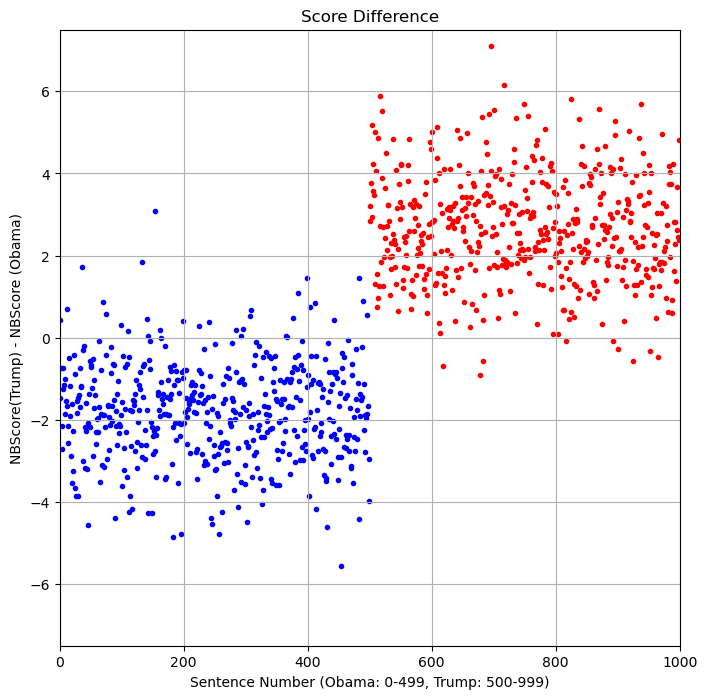

In [29]:
# 2. Visualization: For each of the sentences (0-999) plot (as a scatter plot):
# Score Difference = Naïve Bayes Log Score (Trump) – Naïve Bayes Log Score (Obama)

differences = []
sentence_num = []

count = 0

for sentence in statements['text'].tolist():
    sentence_num.append(count)
    count += 1
    scores = score(statements, sentence)
    differences.append( scores['trump'] - scores['obama'])
    

plt.figure(figsize=(8,8))

# scatter plot
plt.scatter(sentence_num[:500], differences[:500], marker=".", color = 'blue')
plt.scatter(sentence_num[500:], differences[500:], marker=".", color = 'red')

# labels
plt.xlabel("Sentence Number (Obama: 0-499, Trump: 500-999)")
plt.ylabel("NBScore(Trump) - NBScore (Obama)")
plt.title("Score Difference")
plt.xlim(0,1000)
plt.ylim(-7.5,7.5)
plt.grid()
plt.show()    
    

In [30]:
# create list of predicted speakers for statements 
y_preds = []

for sentence in statements['text'].tolist():
    y_preds.append(predict_speaker(statements, sentence))

In [31]:
y_preds

['obama',
 'trump',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'trump',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'trump',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'trump',
 'obama',
 'obama',
 'obama',
 'trump',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'obama',
 'trump',
 'obama',


In [32]:
# y actual/ ground truth for speakers
np.array(statements['speaker'])

array(['obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'obama', 'obama', 'obama', 'obama', 'obama', 'obama',
       'obama', 'oba

In [33]:
((np.array(statements['speaker']) == np.array(y_preds)).sum()) / len(y_preds)

0.96

In [34]:
statements['speaker']

0      obama
1      obama
2      obama
3      obama
4      obama
       ...  
995    trump
996    trump
997    trump
998    trump
999    trump
Name: speaker, Length: 1000, dtype: object

In [35]:
# make speaker a category 
statements["speaker"] = statements["speaker"].astype('category')

In [36]:
# encode speakers as 0 or 1
statements["speaker_encoded"] = statements["speaker"].cat.codes

In [37]:
# add predictions column
statements['predictions'] = y_preds

In [38]:
# make predictions a category 
statements["predictions"] = statements["predictions"].astype('category')

In [39]:
# encode predeictions as 0 or 1
statements["predictions_encoded"] = statements['predictions'].cat.codes

In [40]:
statements

,id,speaker,text,speaker_encoded,predictions,predictions_encoded
0,0,obama,"[recession, marvins, competitors, closed, doze...",0,obama,0
1,1,obama,"[rise, fall, journey, one, nation, one, people]",0,trump,1
2,2,obama,"[differences, differences, personal]",0,obama,0
3,3,obama,"[thats, weve, excluded, lobbyists, policymakin...",0,obama,0
4,4,obama,"[recognize, many, still, strong, desire, focus...",0,obama,0
...,...,...,...,...,...,...
995,995,trump,"[would, like, ask, observe, moment, silence, v...",1,trump,1
996,996,trump,"[dont, give, answer, im, going, win, write, in...",1,trump,1
997,997,trump,"[said, possibly, join, team, said, mr]",1,trump,1
998,998,trump,"[wanted, get, really, really, quickly, pertain...",1,trump,1


In [41]:
# calculate accuracy, sensitivity, specificity, precision, and f1 score 
def metrics(y, ypred):
    
    y = np.array(y)
    ypred = np.array(ypred)
    
    # tp - true positive - actual is positive and the predicted is also positive.
    tp = np.sum((y == 1) & (ypred == 1))
    
    # tn - true negative - actual is negative and the predicted is also negative.
    tn = np.sum((y == 0) & (ypred == 0))
    
    # fp - false positive - actual is negative but the predicted is positive.
    fp = np.sum((y == 0) & (ypred == 1))
    
    # fn - false negative - actual is positive but the predicted is negative.
    fn = np.sum((y == 1) & (ypred == 0))
    
    accuracy = (tp + tn) / len(y)
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    return accuracy, sensitivity, specificity, precision, f1_score

In [42]:
# this function is used for calculating metrics of knn, very unefficient, find way to combine 2 metrics functions
def metrics2(y, ypred):
    
    y = y.tolist()
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(y)):
        if (ypred[i] == "obama"):
            if (y[i] == "obama"):
                # ypred and y are both obama
                tn += 1
            else:
                # y pred is obama but y isnt
                fn += 1
        else:
            if (y[i] == "trump"):
                tp += 1
            else:
                fp += 1
                
    # calculate metrics            
    accuracy = (tp + tn)/(tp + fp + tn + fn)
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    precision = tp/(tp + fp)
    f1_score = 2 * (precision*sensitivity)/(precision+sensitivity)
    
    return (accuracy, sensitivity, specificity, precision, f1_score)

In [43]:
# calculate metrics for speaker and predicted speaker
metrics(statements['speaker_encoded'],statements['predictions_encoded'])

(0.96, 0.982, 0.938, 0.9406130268199234, 0.9608610567514677)

# Part C. k-Nearest Neighbor:


In [44]:
# make train and test data from statements
train_df = statements.sample(frac=0.7)
test_df = statements.drop(train_df.index)

# 1. Select a subset of words to be used for k-NN learning
subset = [x[0] for x in freq.most_common(250)]

# n fold 
# each instance is test set and training set is rest of it 
# small chunks = not reliable accuracy, either 0% or 100% correct 
# average accuracy 
# find k nearest neighbors to make a prediction for that test instance (1s and 0s ), comapre to actual labels 

In [45]:
# Prof given function to vectorize list of words
def word_vector(words, word_list, use_frequency = False): 
    '''
     Convert a list of words to a vector by comparing with words in word_list 
     words: A list of words which we convert to a vector
     word_list: the chosen words against which we compare
     use_frequence: if False, vector components are 1/0, else n = # of occurences
    '''
    # list of unique words
    word_list = sorted(list(set(word_list)))
    
    if use_frequency: 
        count = Counter(words)
        return [count[w] for w in word_list]
    
    else: 
        return [int(w in words) for w in word_list]

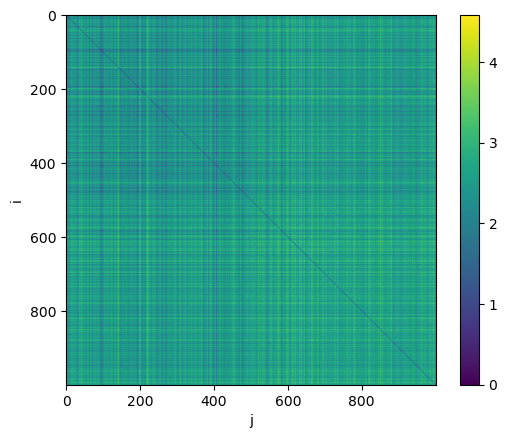

In [46]:
# Vectorize the sentences using your word subset
vectors = [word_vector(W, subset) for W in statements['text']]
A = np.array(vectors)

import math
# def euclidean(x, y):
#     return np.sqrt(sum((x-y)**2))

# calculate distance between 2 vectors
def euclidean(r1, r2):
    total_dist = 0.0
    for r in range(len(r1) - 1):
        total_dist += (float(r1[r]) - float(r2[r])) ** 2
    return math.sqrt(total_dist)

def sim_matrix(A, f):
    """Compute similarity matrix 
    A: array of instance attributes 
    f: similarity / distance measure """
    m = A.shape[0]
    M = np.zeros(shape=(m,m))
    for i in range(m):
        for j in range(m):
            M[i,j] = f(A[i,], A[j,])
        
    return M 

# similarity matrix approach
M = sim_matrix(A, euclidean)
plt.imshow(M)
plt.ylabel('i')
plt.xlabel('j')
plt.colorbar() 

In [47]:
# Vectorize the sentences using your word subset
train_vectors = [word_vector(W, subset) for W in train_df['text']]
#A = np.array(vectors)

# vectors = []
# for sentence in train_df["text"]:
#     vectors.append(word_vector(sentence, subset, use_frequency = False))
# A = np.array(vectors)

In [48]:
# calculates distances between train_vectors and vectors to compare to
def knn(df, train_vectors, subset):
    #store all distances
    all_distances = []
    
    # each sentence
    for s in df['text']:
        distances = {}
        index = 0
        vector = word_vector(s, subset)
        # each vector of training df
        for v in train_vectors:
            distances[index] = euclidean(vector, v)
            index += 1
        all_distances.append(distances)
    distances_sorted = []
    # sort distances
    for dist in all_distances:
        dist = sorted(dist.items(), key=lambda x:x[1])
        distances_sorted.append(dist)
    return distances_sorted

In [49]:
# test knn and store 
distances = knn(test_df, train_vectors, subset)

In [50]:
# get speaker predictions from train df 
def find_predictions(distances, k, df):
    all_speaker = []
    for item in distances:
        speakers = []
        index = k
        for i in range(k):
            val = k - index
            access = int(item[val][0])
            speakers.append(df.iloc[access].speaker)
            index -= 1
        speakers = mode(speakers)
        all_speaker.append(speakers)
    return all_speaker
        

In [51]:
# test find_predictions and store
predictions = find_predictions(distances, 7, train_df)

In [52]:
# calculate accuracy between given y preds and actuals
def accuracy_calc(y_preds, y):
    compare = list(zip(y_preds, y))
    score = 0
    for item in compare:
        if item[0] == item[1]:
            score+=1
    accuracy = score/len(compare)
    return accuracy

In [53]:
accuracy_calc(predictions, test_df.speaker)

0.6066666666666667

In [54]:
# make a list of k values for graphing
k_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]

In [55]:
# calculate accuracies for k values above
accuracy_list = []
for k in k_list:
    predictions = find_predictions(distances, k, train_df)
    accuracy = accuracy_calc(predictions, test_df.speaker)
    accuracy_list.append(accuracy)


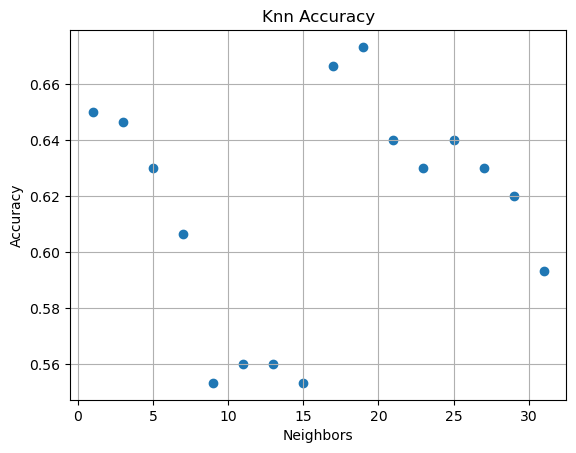

In [56]:
# Plot the accuracy of your model as a function of k over some range
plt.scatter(k_list, accuracy_list)
plt.title('Knn Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [57]:
# metrics
predictions = find_predictions(distances, 7, train_df)
#metrics(test_df.speaker_encoded,predictions_final)
metrics2(test_df.speaker,predictions)


(0.6066666666666667,
 0.22627737226277372,
 0.9263803680981595,
 0.7209302325581395,
 0.34444444444444444)

In [58]:
len(test_df.speaker_encoded)

300

In [59]:
len(test_df.speaker)

300

In [60]:
len(predictions)

300

In [61]:
predictions_final = []
for p in predictions:
    if p == 'obama':
        predictions_final.append(0)
    if p == 'trump':
        predictions_final.append(1)